<a href="https://colab.research.google.com/github/motokikando/sentiment_analysis/blob/main/web_api_tweepy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3==0.7

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget3v5 libencode-locale-perl libfcgi-perl
  libhtml-parser-perl libhtml-tagset-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl libio-string

In [4]:
pip install pymlask

     |████████████████████████████████| 70 kB 3.7 MB/s 
  Created wheel for pymlask: filename=pymlask-0.3.2-py3-none-any.whl size=74906 sha256=48ea8ab98bba5a076d76db3875b6c0a5416558273038fd09f29b19bfed409a0c
  Stored in directory: /root/.cache/pip/wheels/28/a8/2b/a4e4b83dc2ee2d492f49a8ad59325fff4d3540254a5a4ac560
Successfully built pymlask


In [5]:
#ML-Ask確認
from mlask import MLAsk
emotion_analyzer = MLAsk()
result = emotion_analyzer.analyze('私の好きな食べ物はりんごです')
result


{'activation': 'NEUTRAL',
 'emoticon': None,
 'emotion': defaultdict(list, {'suki': ['好き']}),
 'intensifier': {},
 'intension': 0,
 'orientation': 'POSITIVE',
 'representative': ('suki', ['好き']),
 'text': '私の好きな食べ物はりんごです'}

#感情分析(negative and positive % 表示)

---




kandodokan
[None, 'NEUTRAL', None, 'POSITIVE', None, 'NEUTRAL', None, None, None, None, None, 'POSITIVE', None, 'POSITIVE', None, None, 'POSITIVE', 'POSITIVE', None, None, None, None, None, 'POSITIVE', 'POSITIVE', None, 'POSITIVE', None, None, None, None, None, 'NEGATIVE', None, None, None, 'POSITIVE', None, 'POSITIVE', None, 'POSITIVE', 'POSITIVE', 'POSITIVE', None, None, None]


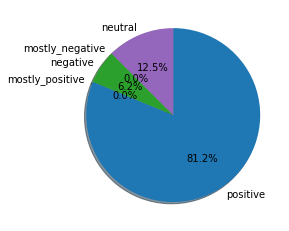

In [8]:
from mlask import MLAsk
from collections import Counter
import pprint
import collections
import matplotlib.pyplot as plt
import tweepy



def analyze_emotion(tweet):

  #Twitter API
  Consumer_key = ''
  Consumer_secret = ''
  Access_token = ''
  Access_secret = ''

  #API認証
  auth = tweepy.OAuthHandler(Consumer_key, Consumer_secret)
  auth.set_access_token(Access_token, Access_secret)
  api = tweepy.API(auth, wait_on_rate_limit = True)

  tweet_emotion = []
  id = user_id

  #tweet取得
  tweets_data = [tweet.text for tweet in tweepy.Cursor(api.user_timeline, id=id).items(100) if (list(tweet.text)[:2]!=['R', 'T']) & (list(tweet.text)[0]!='@')]



  #各ツイートをMLAskで分析
  for i in range(len(tweets_data)):
    emotion_analyzer = MLAsk()
    result = emotion_analyzer.analyze(tweets_data[i])
    # pprint.pprint(result)
    a = result.get("orientation")
    tweet_emotion.append(a)
  print(tweet_emotion)
  tweet_emotion.count(None)

  #各感情ごとの要素数のカウント
  negative_count = tweet_emotion.count('NEGATIVE')
  mostly_negative_count = tweet_emotion.count('mostly_NEGATIVE')
  positive_count = tweet_emotion.count('POSITIVE')
  mostly_positive_count = tweet_emotion.count('mostly_POSITIVE')
  neutral_count = tweet_emotion.count('NEUTRAL')

  #円グラフ表示
  labels = 'positive', 'mostly_positive', 'negative', 'mostly_negative', 'neutral'
  sizes = [positive_count, mostly_positive_count, negative_count, mostly_negative_count, neutral_count]
  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, shadow=True, autopct='%1.1f%%', counterclock=False, startangle=90)
  plt.show()

user_id = input()

analyze_emotion(user_id)

#感情分析(representative)

kandodokan
Counter({'yorokobi': 8, 'suki': 5, 'iya': 2, 'takaburi': 1, 'odoroki': 1, 'yasu': 1})


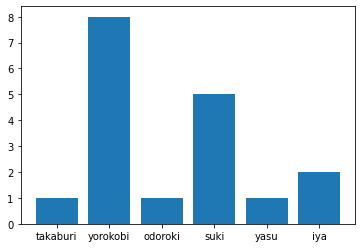

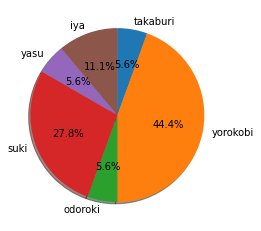

In [9]:
from mlask import MLAsk
from collections import Counter
import pprint
import collections
import matplotlib.pyplot as plt
import tweepy

def analyze_emotion(tweet):

  #Twitter API
  Consumer_key = ''
  Consumer_secret = ''
  Access_token = ''
  Access_secret = ''
  #API認証
  auth = tweepy.OAuthHandler(Consumer_key, Consumer_secret)
  auth.set_access_token(Access_token, Access_secret)
  api = tweepy.API(auth, wait_on_rate_limit = True)

  tweet_emotion = []
  id = user_id

  tweets_data = [tweet.text for tweet in tweepy.Cursor(api.user_timeline, id=id).items(1000) if (list(tweet.text)[:2]!=['R', 'T']) & (list(tweet.text)[0]!='@')]

  #各ツイートをMLAskで分析
  for i in range(len(tweets_data)):
    emotion_analyzer = MLAsk()
    result = emotion_analyzer.analyze(tweets_data[i])
    # print(result)
    a = result.get("representative")
    if a == None:
      pass
    else:
      tweet_emotion.append(a)
  m = [i[0] for i in tweet_emotion]
  c = collections.Counter(m)
  print(c)

  #棒グラフ表示
  plt.bar(list(c.keys()), list(c.values()))

  #円グラフ表示
  labels = list(c.keys())
  sizes = list(c.values())
  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, shadow=True, autopct='%1.1f%%', counterclock=False, startangle=90)
  plt.show()

user_id = input()

analyze_emotion(user_id)